## Дедлайн 1
Реализован метод трапеций. Простая формула: $\int_{x_1}^{x_2}f(x)dx\approx\frac{f(x_1)+f(x_2)}{2}(x_2-x_1)$. Для равномерной сетки $f(x)$ с $x$ от $a$ до $b$ с числом разбиений $N$ и шагом $h=\frac{b-a}{N}$, составная формула: $I=\int_{a}^{b}f(x)dx\approx\frac{b-a}{2N}\sum_{i=1}^{N}(f(x_i)+f(x_{i+1}))=I_h$. Порядок точности: $|I-I_h|\leqslant ch^2$.

### Реализация:

In [3]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

def integral_trap(x, y, N):
    ans = 0
    h = (x[N] - x[0]) / (2 * N)
    for i in range(N):
        ans += (y[i] + y[i + 1])
    return ans * h

Populating the interactive namespace from numpy and matplotlib


### Эксперименты:

Сравним работу этой реализации с точным аналитическим решением на примере трёх функций: гладкой $f(x)=x^2$, разрывной $f(x)=x^2, x < 0; f(x)=x+3, x \geqslant 0$, осциллирующей $f(x)=sin(500x)$.

#### Гладкая:

Здесь используется аналитическое решение интеграла, равное примерно 83.333.

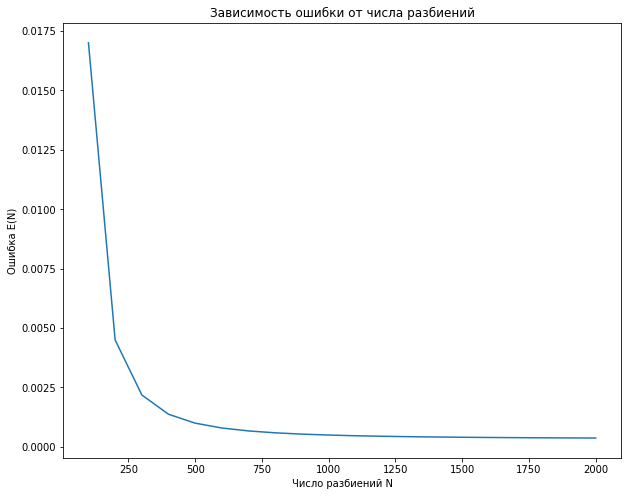

In [30]:
N_list = np.arange(100, 2100, 100)
E_list = np.empty(N_list.shape[0])
a = -5
b = 5
for i in range(N_list.shape[0]):
    h = (b - a) / N_list[i]
    x = np.arange(a, b + h, h)
    y = x**2
    E_list[i] = np.abs(integral_trap(x, y, N_list[i]) - 83.333)
plt.figure(figsize=(10, 8))
plt.plot(N_list, E_list)
plt.title('Зависимость ошибки от числа разбиений')
plt.xlabel('Число разбиений N')
plt.ylabel('Ошибка E(N)')
plt.show()

#### Разрывная:

Здесь используется аналитическое решение интеграла, равное примерно 41.667 + 27.5 = 69.167

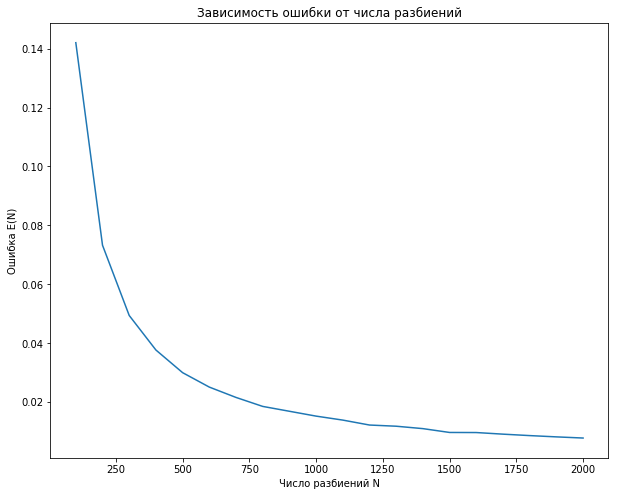

In [32]:
N_list = np.arange(100, 2100, 100)
E_list = np.empty(N_list.shape[0])
a = -5
b = 5
for i in range(N_list.shape[0]):
    h = (b - a) / N_list[i]
    x = np.arange(a, b + h, h)
    y = np.empty(x.shape[0])
    y[x < 0] = x[x < 0]**2
    y[x >= 0] = x[x >= 0] + 3
    E_list[i] = np.abs(integral_trap(x, y, N_list[i]) - 69.167)
plt.figure(figsize=(10, 8))
plt.plot(N_list, E_list)
plt.title('Зависимость ошибки от числа разбиений')
plt.xlabel('Число разбиений N')
plt.ylabel('Ошибка E(N)')
plt.show()

#### Осциллирующая:

Тут используется аналитическое решение интеграла, равное 0.

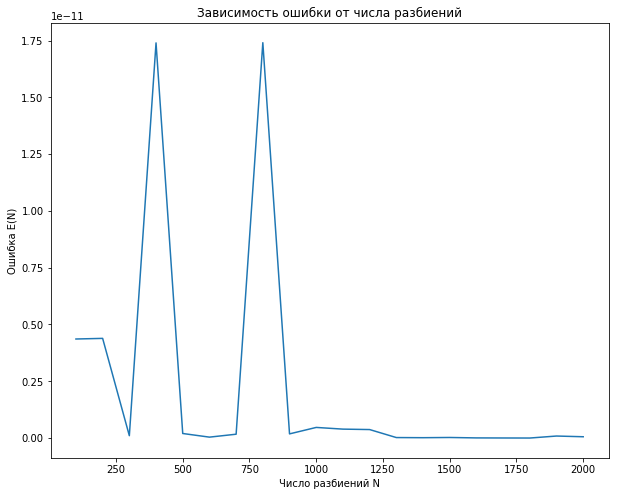

In [42]:
N_list = np.arange(100, 2100, 100)
E_list = np.empty(N_list.shape[0])
a = -5
b = 5
for i in range(N_list.shape[0]):
    h = (b - a) / N_list[i]
    x = np.arange(a, b + h, h)
    y = np.sin(x * 500)
    E_list[i] = np.abs(integral_trap(x, y, N_list[i]))
plt.figure(figsize=(10, 8))
plt.plot(N_list, E_list)
plt.title('Зависимость ошибки от числа разбиений')
plt.xlabel('Число разбиений N')
plt.ylabel('Ошибка E(N)')
plt.show()

**В первых двух случаях, с увеличением числа разбиений ошибка уменьшается и становится очень близкой к нулю, что и следовало ожидать, а в третьем случае ошибка скачет для $100 < N < 1000$ и почти не меняется при больших $N$, и такое поведение тоже впринципе ожидаемо для такой осциллирующей функции.**

Теперь построим график логарифмов шагов и ошибок для гладкой функции $f(x)=x^2$, сранивая с точным значением интеграла.

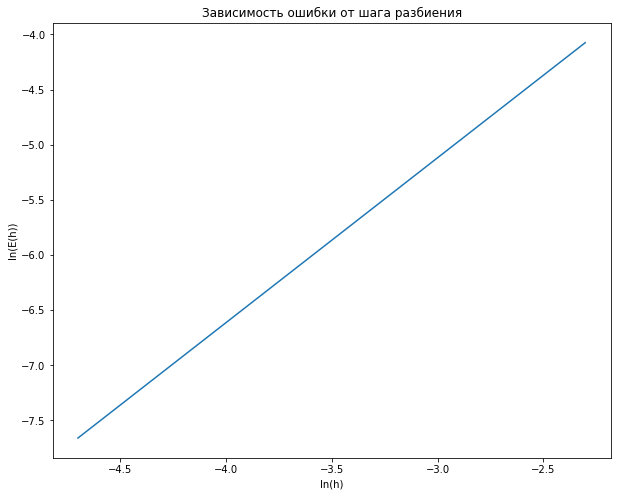

In [40]:
N_list = np.arange(100, 2100, 1000)
E_list = np.empty(N_list.shape[0])
a = -5
b = 5
for i in range(N_list.shape[0]):
    h = (b - a) / N_list[i]
    x = np.arange(a, b + h, h)
    y = x**2
    E_list[i] = np.abs(integral_trap(x, y, N_list[i]) - 83.333)
plt.figure(figsize=(10, 8))
plt.plot(np.log(10 / N_list), np.log(E_list))
plt.title('Зависимость ошибки от шага разбиения')
plt.xlabel('ln(h)')
plt.ylabel('ln(E(h))')
plt.show()

$(ln(|I-I_h|)\leqslant ln(c) + p*ln(h))$ (Дальнейшие выводы берутся из построенного уравнения прямой по двум точкам (-4, -6.5) и (-3, -5) на нашей прямой: $y = 1.5x - 0.5$) Сдвиг прямой примерно равен -0.5, значит константа $c$ в $|I-I_h|\leqslant ch^p$ равна $e^{-0.5}=0.606531$. Коэффицент при $ln(h)$ равен 1.5, значит округлив получаем $p = 2$.